# spline regression

In [30]:
# import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline

# read data_set
data = pd.read_csv("Wage.csv")

data.head()

,ID,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


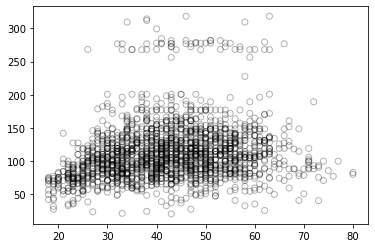

In [31]:
data_x = data['age']
data_y = data['wage']

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)

# Visualize the relationship b/w age and wage
import matplotlib.pyplot as plt
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.show()

### Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

# Fitting linear regression model
x = train_x.values.reshape(-1,1)
model = LinearRegression()
model.fit(x,train_y)
print(model.coef_)
print(model.intercept_)


[0.72190831]
80.65287740759283


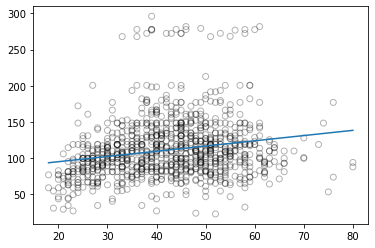

In [13]:
# Prediction on validation dataset
valid_x = valid_x.values.reshape(-1,1)
pred = model.predict(valid_x)

# Visualisation
# We will use 70 plots between minimum and maximum values of valid_x for plotting
xp = np.linspace(valid_x.min(),valid_x.max(),70)
xp = xp.reshape(-1,1)
pred_plot = model.predict(xp)

plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot)
plt.show()

### Improvement over Linear Regression: Polynomial Regression

[ -0.05194765   5.22868974 -10.03406116]


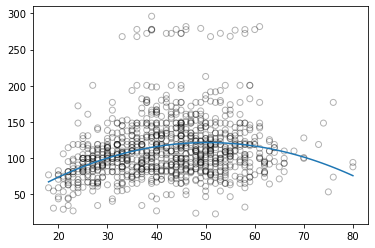

[-4.58962275e-05  9.10115001e-03 -6.94994507e-01  2.42916196e+01
 -2.08514898e+02]


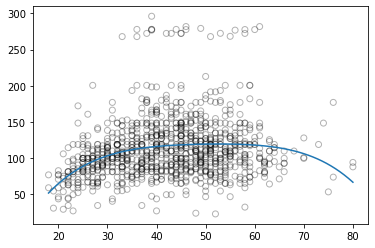

[-1.41650743e-15  8.19171726e-13 -2.14615625e-10  3.36460128e-08
 -3.51041674e-06  2.56343476e-04 -1.34080472e-02  5.05072549e-01
 -1.35694703e+01  2.53026420e+02 -3.10207120e+03  2.24158770e+04
 -7.20795101e+04]


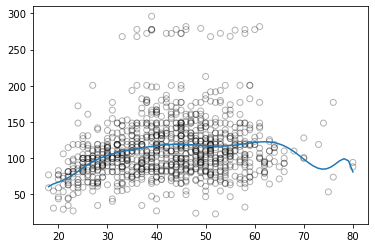

[-1.42763940e-20  9.25803682e-18 -2.66613999e-15  4.41957867e-13
 -4.47931763e-11  2.50030382e-09 -6.13228634e-09 -1.23161352e-05
  1.22660314e-03 -7.03576837e-02  2.76572187e+00 -7.78326985e+01
  1.57414493e+03 -2.23951075e+04  2.12917810e+05 -1.21430318e+06
  3.13984481e+06]


C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\IPython\core\interactiveshell.py:2878: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


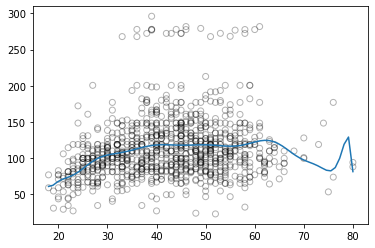

C:\ProgramData\Anaconda3\envs\biomass_zonal\lib\site-packages\IPython\core\interactiveshell.py:2878: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[-3.05227908e-37  1.23497104e-34 -1.68698788e-32  4.67116384e-31
  7.56615379e-29 -2.36060078e-27 -4.57675342e-25  3.09517342e-24
  2.73905808e-21  5.77575700e-20 -1.46019128e-17 -6.82621086e-16
  7.33066321e-14  4.83136549e-12 -4.10811685e-10 -2.40681779e-08
  2.80725912e-06  2.50610367e-05 -1.60697593e-02  1.14013287e+00
 -4.44424385e+01  1.10974685e+03 -1.82775516e+04  1.93171384e+05
 -1.19164522e+06  3.26937145e+06]


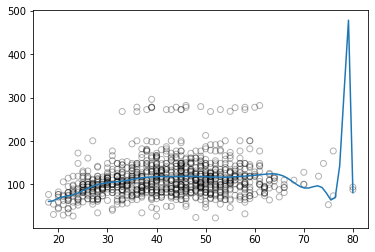

In [18]:
for n in [2, 4, 12, 16, 25]:# Generating weights for polynomial function with degree =2
    weights = np.polyfit(train_x, train_y, n)
    print(weights)
    # -> array([ -0.05194765,   5.22868974, -10.03406116])

    # Generating model with the given weights
    model = np.poly1d(weights)

    # Prediction on validation set
    pred = model(valid_x)
    # We will plot the graph for 70 observations only
    xp = np.linspace(valid_x.min(),valid_x.max(),70)
    pred_plot = model(xp)
    plt.scatter(valid_x, valid_y, facecolor='None', edgecolor='k', alpha=0.3)
    plt.plot(xp, pred_plot)
    plt.show()

## Regression Splines

#### Piecewise Step Functions

In [21]:
train_x

1382    49
23      40
2140    55
1117    32
933     42
        ..
2763    44
905     49
1096    61
235     34
1061    29
Name: age, Length: 2010, dtype: int64

In [19]:
# Dividing the data into 4 bins
df_cut, bins = pd.cut(train_x, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(17.938, 33.5]    504
(33.5, 49.0]      941
(49.0, 64.5]      511
(64.5, 80.0]       54
Name: age, dtype: int64

In [22]:
df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)

# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 33.5]","(33.5, 49.0]","(49.0, 64.5]","(64.5, 80.0]"
1382,0,1,0,0
23,0,1,0,0
2140,0,0,1,0
1117,1,0,0,0
933,0,1,0,0


In [29]:
valid_x

array([[58],
       [45],
       [61],
       [39],
       [22],
       [58],
       [57],
       [33],
       [42],
       [33],
       [53],
       [49],
       [29],
       [42],
       [58],
       [23],
       [49],
       [36],
       [32],
       [33],
       [30],
       [44],
       [52],
       [35],
       [49],
       [22],
       [42],
       [59],
       [70],
       [34],
       [40],
       [44],
       [45],
       [40],
       [29],
       [41],
       [21],
       [29],
       [31],
       [59],
       [50],
       [34],
       [47],
       [28],
       [53],
       [40],
       [62],
       [35],
       [45],
       [52],
       [23],
       [28],
       [23],
       [33],
       [22],
       [45],
       [59],
       [45],
       [40],
       [27],
       [43],
       [39],
       [41],
       [38],
       [44],
       [32],
       [33],
       [27],
       [58],
       [52],
       [39],
       [30],
       [54],
       [33],
       [35],
       [43],
       [36],

In [36]:
df_steps_dummies.columns = ['17.938-33.5','33.5-49','49-64.5','64.5-80'] 

# Fitting Generalised linear models
fit3 = sm.GLM(df_steps.wage, df_steps_dummies).fit()

# Binning validation set into same 4 bins
bin_mapping = np.digitize(valid_x, bins) 
X_valid = pd.get_dummies(bin_mapping)

# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)

# Calculating RMSE
from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid_y, pred2)) 
print(rms)

39.990600783110395


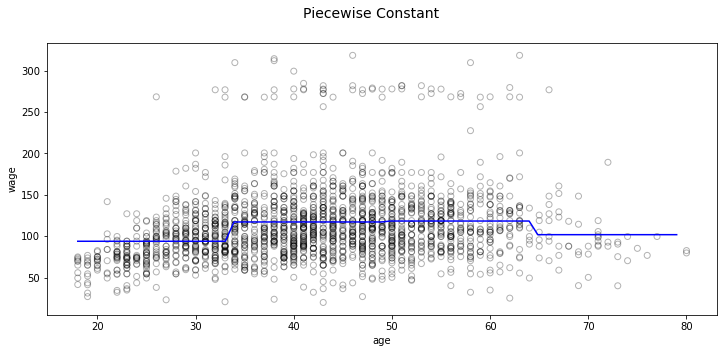

In [37]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(xp, pred2, c='b')

ax1.set_xlabel('age')
ax1.set_ylabel('wage')
plt.show()

### Basis Functions

##### Piecewise Polynomials

##### Cubic and Natural Cubic Splines

In [38]:
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [39]:
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(valid_y, pred1))
print(rms1)
# -> 39.4
rms2 = sqrt(mean_squared_error(valid_y, pred2))
print(rms2)
# -> 39.3

39.40318768341124
39.34292609147627


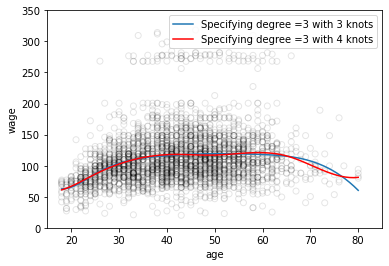

In [40]:
# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

# Plot the splines and error bands
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Specifying degree =3 with 3 knots')
plt.plot(xp, pred2, color='r', label='Specifying degree =3 with 4 knots')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

##### To smooth the polynomial beyond the boundary knots, we will use a special type of spline known as Natural Spline.

39.44823813743623


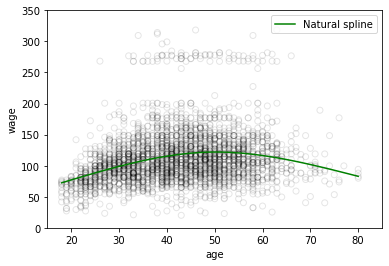

In [42]:
# Generating natural cubic spline
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))
# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)
# -> 39.44

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# Plot the spline
plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

### Comparison of Regression Splines with Polynomial Regression